## Preliminaries

In [1]:
import pandas as pd
from plotnine import *
from plotnine.data import mtcars
%matplotlib inline

In [2]:
# misc
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Data

In [3]:
import statsmodels.api as sm

mtcars = sm.datasets.get_rdataset("mtcars", "datasets").data
mcycle = sm.datasets.get_rdataset('mcycle', 'MASS').data
diamonds = sm.datasets.get_rdataset("diamonds", "ggplot2").data
economics = sm.datasets.get_rdataset("economics", "ggplot2").data
mpg = sm.datasets.get_rdataset("mpg", "ggplot2").data


# or
mtcars = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/mtcars.csv')
mcycle = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MASS/mcycle.csv')
diamonds = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ggplot2/diamonds.csv')
economics = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ggplot2/economics.csv')
mpg = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ggplot2/mpg.csv')



starwars = pd.read_csv('../data/starwars.csv') 


/Users/micl/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


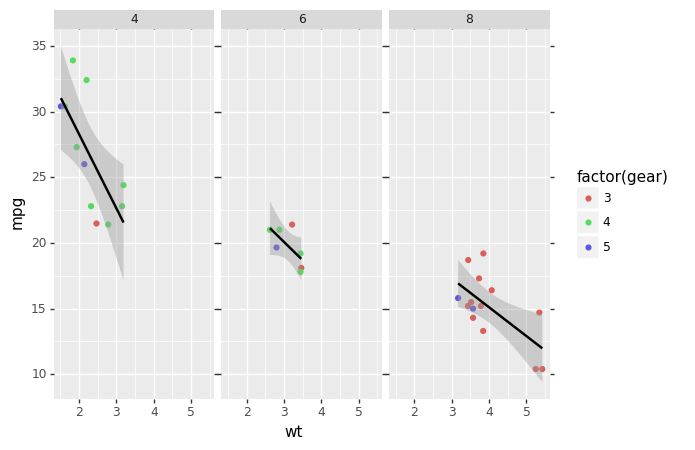

<ggplot: (-9223372029304710782)>

In [4]:
# basics

(
ggplot(mtcars, aes(x = 'wt', y = 'mpg')) + 
    geom_point(aes(color = 'factor(gear)')) + 
    stat_smooth(method = 'lm') + 
    facet_wrap('~ cyl')
)

## Layers

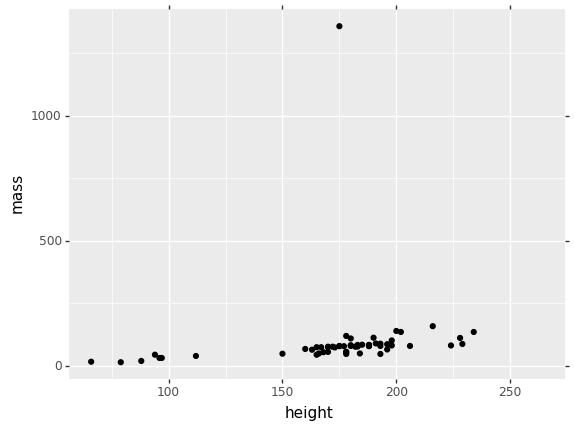

<ggplot: (7550065051)>

In [5]:
(
ggplot(aes(x = 'height', y = 'mass'), data = starwars) + 
    geom_point()
)

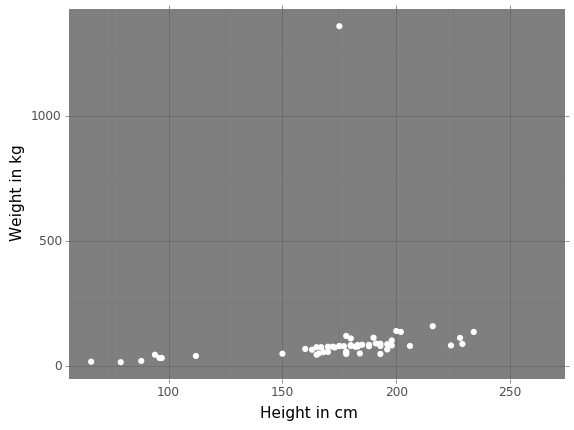

<ggplot: (7550564637)>

In [6]:
(
ggplot(aes(x = 'height', y = 'mass'), data = starwars) + 
    geom_point(color = 'white') + 
    labs(x = 'Height in cm', y = 'Weight in kg') + 
    theme_dark()
)

## Examples

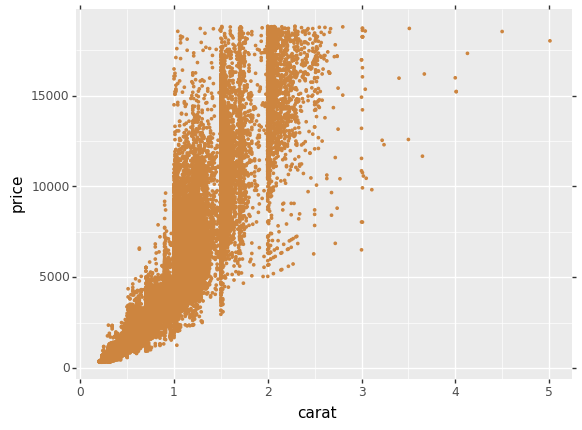

<ggplot: (280093241)>

In [7]:
(
ggplot(aes(x = 'carat', y = 'price'), data = diamonds) + 
    geom_point(size = .5, color = 'peru')
)

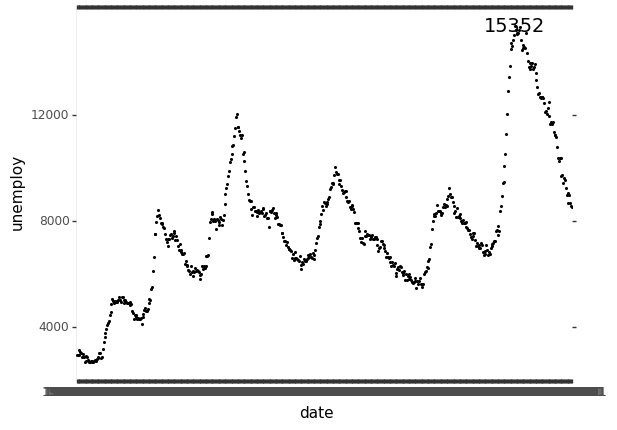

<ggplot: (7556584133)>

In [8]:
# had issues with path/line
(
ggplot(aes(x = 'date', y = 'unemploy'), data = economics) +
    geom_point(size = .25) + 
    geom_text(
        aes(label = 'unemploy'),
        size = 14,
        data = economics[(economics["date"] == '2009-10-01')]
  )
)

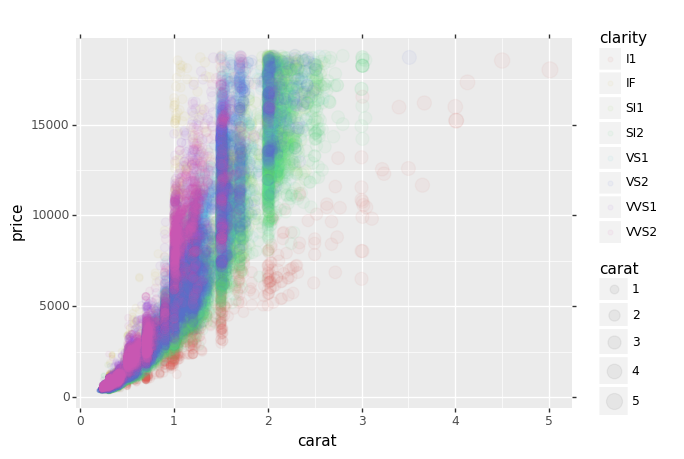

<ggplot: (-9223372029304710887)>

In [9]:
(
ggplot(aes(x = 'carat', y = 'price'), data = diamonds) + 
    geom_point(aes(size = 'carat', color = 'clarity'), alpha = .05) 
)

## Stats

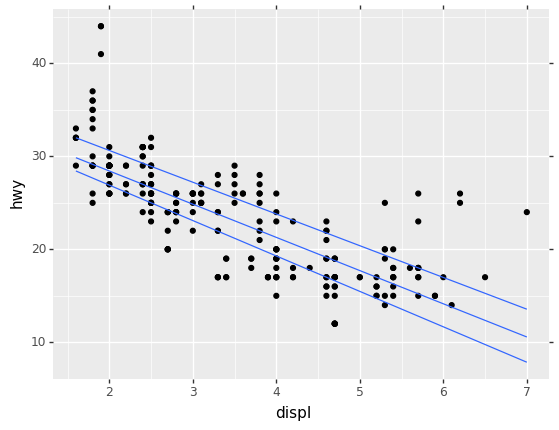

<ggplot: (-9223372029303086809)>

In [10]:
(
ggplot(mpg, aes('displ', 'hwy')) +
    geom_point() +
    geom_quantile()
)

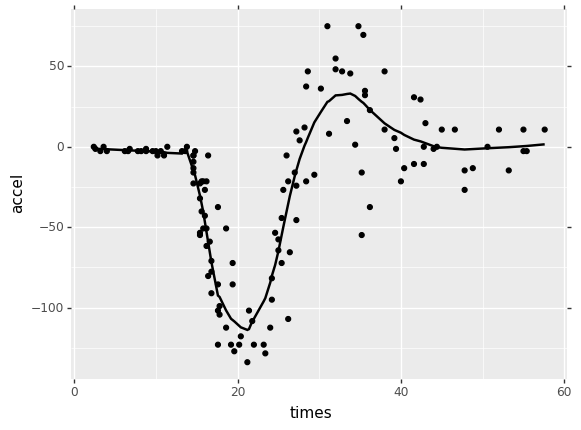

<ggplot: (-9223372029300205084)>

In [11]:
# default lowess not so great and would need some tweaking via span
(
ggplot(aes(x = 'times', y = 'accel'), data = mcycle) +
  geom_point() +
  geom_smooth(method = 'lowess', span = .2)  # smoothing functions require other modules
)

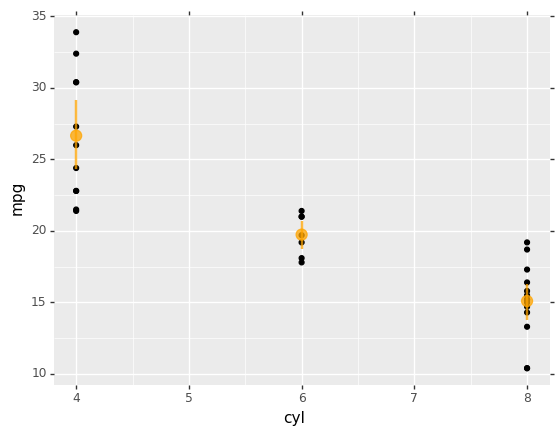

<ggplot: (7551128896)>

In [12]:
(
ggplot(mtcars, aes('cyl', 'mpg')) + 
    geom_point() + 
    stat_summary(
        fun_data = "mean_cl_boot",
        colour = "orange",
        alpha = .75,
        size = 1
  )
)

## Scales

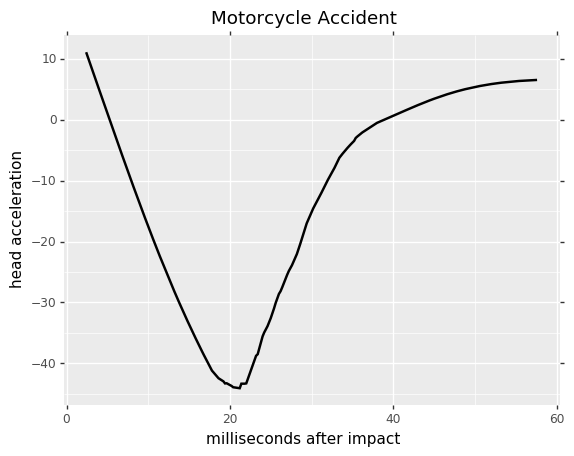

<ggplot: (-9223372029298192710)>

In [13]:
(
ggplot(aes(x = 'times', y = 'accel'), data = mcycle) +
  geom_smooth(se = False) +
  labs(
    x     = 'milliseconds after impact', 
    y     = 'head acceleration', 
    title = 'Motorcycle Accident'
  )
)

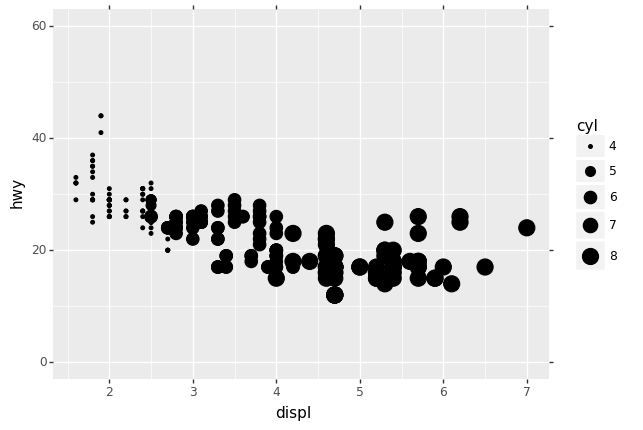

<ggplot: (-9223372029303106567)>

In [14]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy', size = 'cyl')) + 
    geom_point() + 
    ylim(0, 60)
)

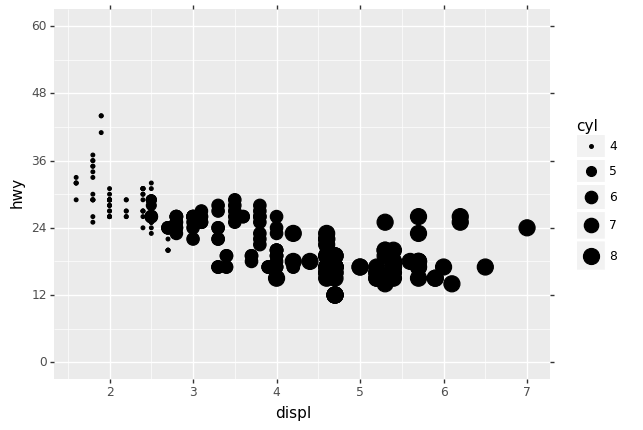

<ggplot: (7554514212)>

In [15]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy', size = 'cyl')) + 
    geom_point() + 
    scale_y_continuous(
        limits = [0, 60],
        breaks = range(0, 61, 12),
        minor_breaks = range(6, 61, 6)
  )
)

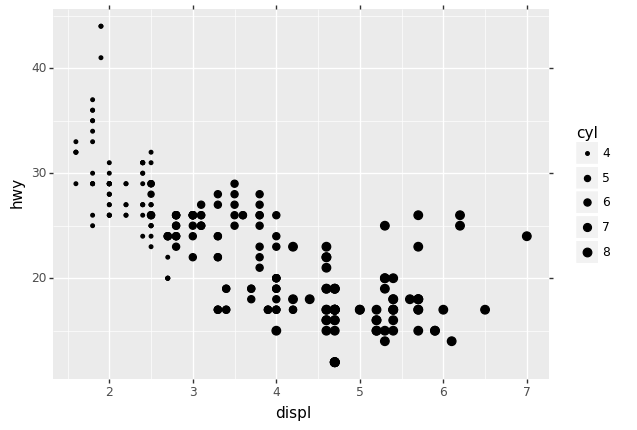

<ggplot: (7551276850)>

In [16]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy', size = 'cyl')) +
  geom_point() +
  scale_size(range = [1, 3])
)

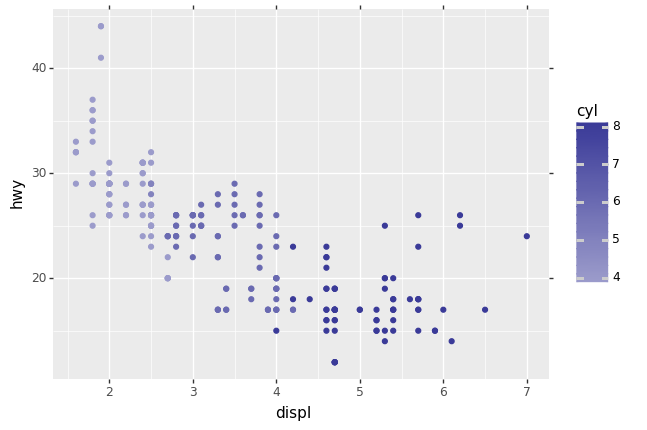

<ggplot: (7556497640)>

In [17]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy', color = 'cyl')) +
  geom_point() +
  scale_color_gradient2()
)

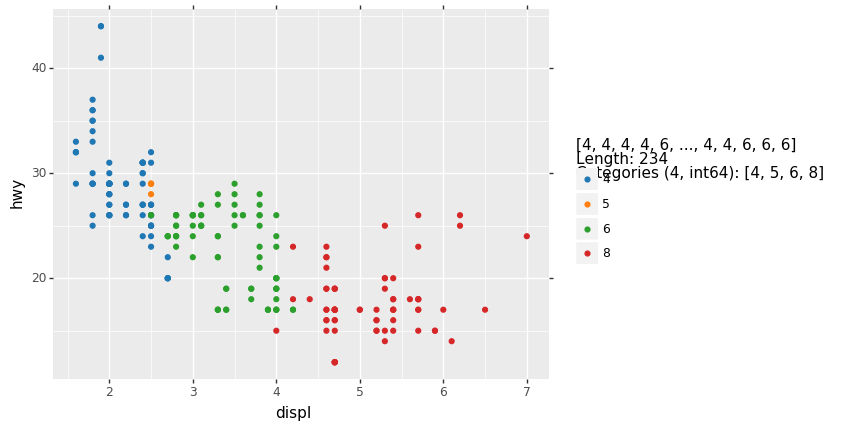

<ggplot: (-9223372029300655472)>

In [18]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy', color = pd.Categorical(mpg['cyl']))) +
  geom_point() +
  scale_color_manual(values = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])
)

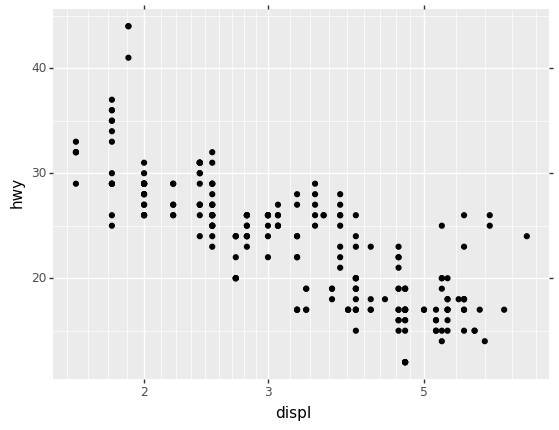

<ggplot: (7554123335)>

In [19]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy')) +
  geom_point() +
  scale_x_log10()
)

## Facets

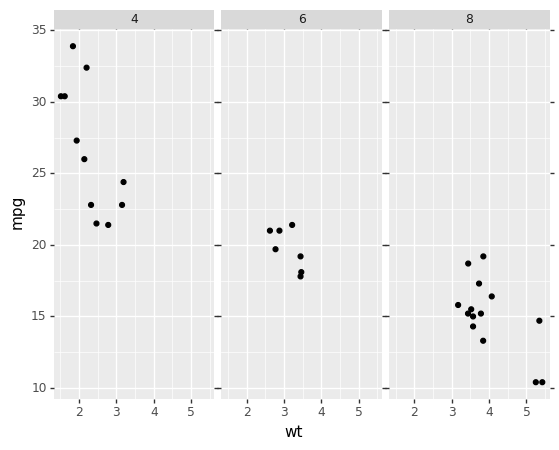

<ggplot: (7555491150)>

In [20]:
(
ggplot(mtcars, aes(x = 'wt', y = 'mpg')) + 
  geom_point() +
  facet_grid('~ cyl')
)

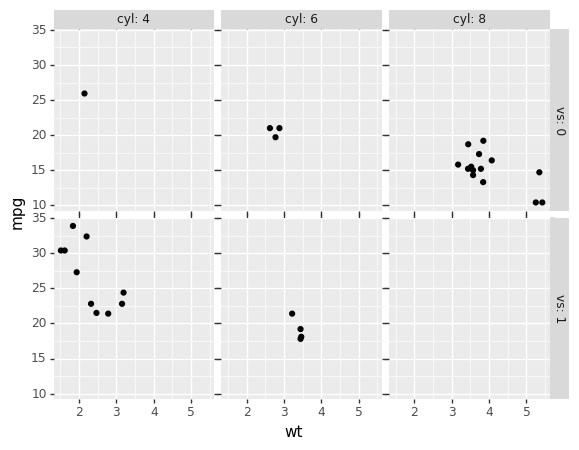

<ggplot: (-9223372029298610365)>

In [21]:
(
ggplot(mtcars, aes(x = 'wt', y = 'mpg')) + 
  geom_point() +
  facet_grid('vs ~ cyl', labeller = label_both)
)

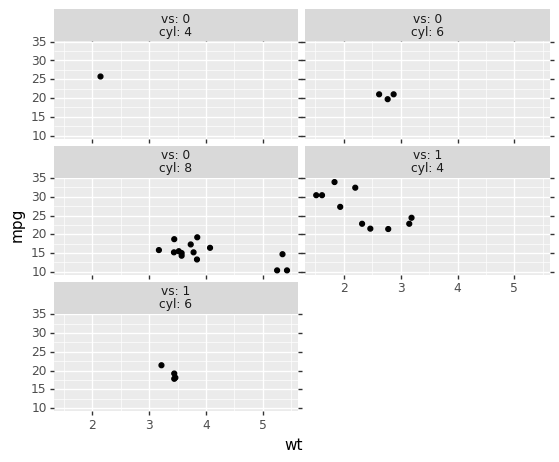

<ggplot: (7557154957)>

In [22]:
(
ggplot(mtcars, aes(x = 'wt', y = 'mpg')) + 
  geom_point() +
  facet_wrap('~ vs + cyl', labeller = label_both, ncol=2)
)

## Fine Control

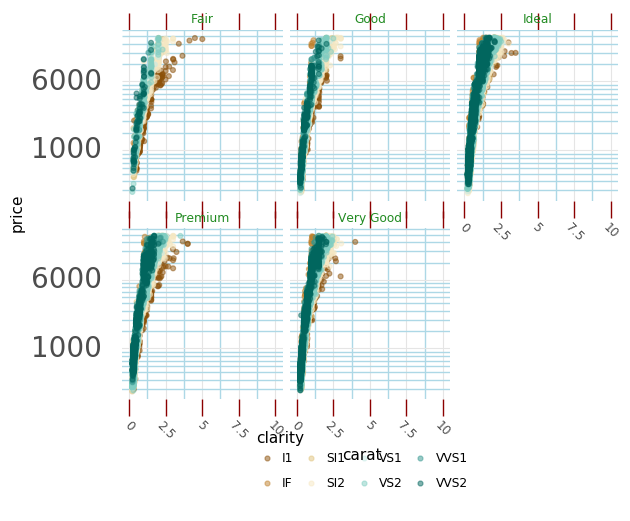

<ggplot: (7556490381)>

In [23]:
(
ggplot(aes(x = 'carat', y = 'price'), data = diamonds) +
  geom_point(aes(color = 'clarity'), alpha = .5) + 
  scale_y_log10(breaks = range(1000, 10000, 5000)) +
  xlim(0, 10) +
  scale_color_brewer(type = 'div') +
  facet_wrap('~ cut', ncol=3) +
  theme_minimal() +
  theme(axis_ticks_major_x = element_line(color = 'darkred'),
        axis_text_x = element_text(angle = -45),
        axis_text_y = element_text(size = 20),
        strip_text = element_text(color = 'forestgreen'),
        strip_background = element_blank(),
        panel_grid_minor = element_line(color = 'lightblue'),
        legend_position = 'bottom')
)

## Themes

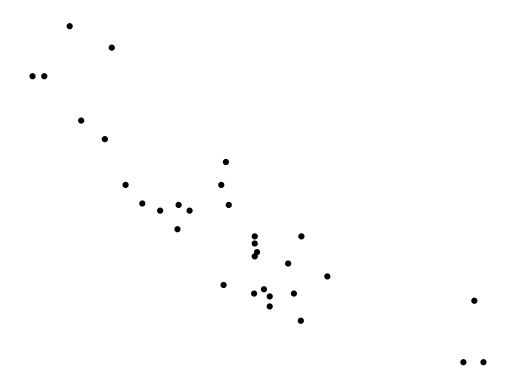

<ggplot: (-9223372029300264686)>

In [24]:
(
ggplot(mtcars, aes(x = 'wt', y = 'mpg')) + 
    geom_point() +    
    theme_void()
)

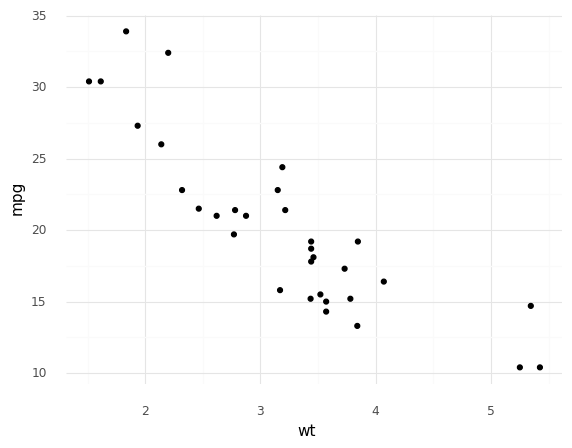

<ggplot: (7553230982)>

In [25]:
(
ggplot(mtcars, aes(x = 'wt', y = 'mpg')) + 
    geom_point() +    
    theme_minimal()
)